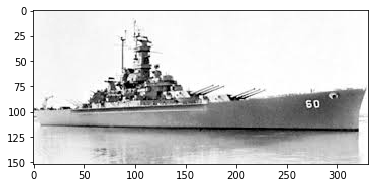

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR= "vehicles"

CATEGORIES = ['battleship', 'fighter']


for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    counter = 0
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        if(counter == 10):
            plt.show()
            break
        counter= counter + 1
    break



In [81]:
print(img_array.shape)

(152, 331)


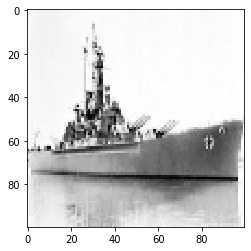

In [82]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap= 'gray')
plt.show()

In [83]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                
            except Exception as e:
                pass
            
create_training_data()

In [84]:
print(len(training_data))

1124


In [85]:
import random

random.shuffle(training_data)

In [86]:
X = []
y = []

In [87]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE,IMG_SIZE, 1)
    

In [98]:
import pickle

pickle_out = open("Xnew.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("ynew.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [89]:
pickle_in = open("Xnew.pickle","rb")
X = pickle.load(pickle_in)

In [90]:
X[1]

array([[[185],
        [180],
        [180],
        ...,
        [166],
        [167],
        [170]],

       [[185],
        [180],
        [174],
        ...,
        [165],
        [167],
        [170]],

       [[184],
        [178],
        [173],
        ...,
        [165],
        [167],
        [170]],

       ...,

       [[191],
        [144],
        [152],
        ...,
        [134],
        [137],
        [150]],

       [[200],
        [194],
        [131],
        ...,
        [136],
        [140],
        [155]],

       [[176],
        [180],
        [155],
        ...,
        [138],
        [152],
        [157]]], dtype=uint8)

In [91]:
testing_data = []

DATADIR= "vehicles"

CATEGORIES = ['testing']

IMG_SIZE = 100


def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        #class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                test_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #training_data.append([new_array, class_num])
                testing_data.append([test_array])
            except Exception as e:
                pass
            
create_testing_data()

In [92]:
print(len(testing_data))

31


In [93]:
test = []
testy = []

In [94]:
# import random

# random.shuffle(testing_data)

In [95]:
for features in testing_data:
    test.append(features)

test = np.array(test).reshape(-1, IMG_SIZE,IMG_SIZE, 1)


In [96]:
print(test[1])

[[[104]
  [101]
  [104]
  ...
  [ 85]
  [ 84]
  [ 81]]

 [[100]
  [103]
  [105]
  ...
  [ 83]
  [ 83]
  [ 84]]

 [[101]
  [105]
  [108]
  ...
  [ 87]
  [ 83]
  [ 82]]

 ...

 [[138]
  [138]
  [137]
  ...
  [107]
  [107]
  [108]]

 [[139]
  [132]
  [133]
  ...
  [108]
  [104]
  [104]]

 [[136]
  [135]
  [135]
  ...
  [106]
  [104]
  [103]]]


In [97]:
pickle_out = open("testnew.pickle","wb")
pickle.dump(test, pickle_out)
pickle_out.close()
